## Examples

### Import packages / modules

Import  along with the other Python packages used in
these examples:

In [1]:
import string
import random
import tempfile
import urllib.request

import numpy
import pandas as pd
import matplotlib.pyplot as plt

import dmslogo
from dmslogo.colorschemes import CBPALETTE

Set options to display pandas DataFrames:

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

# Simple example on toy data

## Draw a basic logo

Simple plotting can be done using the `dmslogo.logo.draw_logo`
function.

This function takes in as input a pandas DataFrame that has columns
with:

> * site in sequential integer numbering

> * letter (i.e., amino acid or nucleotide)

> * height of letter (can be any positive number)

Here make a simple data frame that fits these specs:

In [3]:
data = pd.DataFrame.from_records(
        data=   [(    1,      'A',        1),
                 (    1,      'C',      0.7),
                 (    2,      'C',      0.1),
                 (    2,      'D',      1.2),
                 (    5,      'A',      0.4),
                 (    5,      'K',      0.4)],
        columns=['site', 'letter', 'height'])

data

,site,letter,height
0,1,A,1.0
1,1,C,0.7
2,2,C,0.1
3,2,D,1.2
4,5,A,0.4
5,5,K,0.4


Use `dmslogo.logo.draw_logo` to draw the logo plot, passing
the names of the columns with each piece of required data:

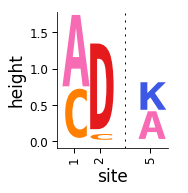

In [4]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height')

Add a title:

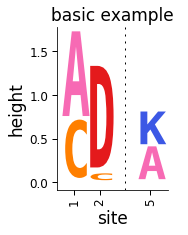

In [5]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            title='basic example')

Note that the call to `dmslogo.logo.draw_logo` returns
matplotlib Figure and Axis instances, which we have called `fig` and
`ax`. We can save the figure to a file using the
[savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)
command of `fig`. Below we show an example of how to do this saving to
a temporary file:

In [6]:
with tempfile.NamedTemporaryFile(mode='wb', suffix='.png') as f:
    fig.savefig(f, dpi=450, bbox_inches='tight')

# Drawing without breaks

Note how the above plot has a “break” (gap and dashed line) to indicate
a break in the sequential numbering in `x_col` between 2 and 5. This
is useful as it indicates when we are breaking the sequence when drawing
just snippets of a protein. If you do **not** want to indicate breaks in
this way, turn off the `addbreaks` option. Now the logo just goes
directly from 2 to 5 without indicating a break:

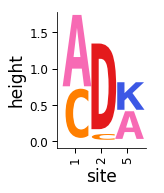

In [7]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            addbreaks=False)

# Setting letter colors

The above plot colored letters using a default amino-acid coloring
scheme. You can set a different coloring scheme using `colorscheme`
and `missing_color`, or you can set letter colors at a site-specific
level by adding a column to `data` that specifies the colors. Here we
color letters at site-specific level:

In [8]:
data['color'] = ['red', 'gray', 'gray', 'gray', 'red', 'gray']
data

,site,letter,height,color
0,1,A,1.0,red
1,1,C,0.7,gray
2,2,C,0.1,gray
3,2,D,1.2,gray
4,5,A,0.4,red
5,5,K,0.4,gray


Now plot using `color_col` to set the colors:

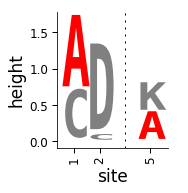

In [9]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            color_col='color')

# Labeling x-axis ticks

Sometimes we want to label sites with something other than the
sequential integer numbers. We can do this by adding a column for the
xtick labels to `data`:

In [10]:
data['site_label'] = ['D1', 'D1', 'A2', 'A2', 'F5', 'F5']
data

,site,letter,height,color,site_label
0,1,A,1.0,red,D1
1,1,C,0.7,gray,D1
2,2,C,0.1,gray,A2
3,2,D,1.2,gray,A2
4,5,A,0.4,red,F5
5,5,K,0.4,gray,F5


Now use `xtick_col` to set the xticks:

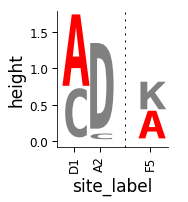

In [11]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            color_col='color',
                            xtick_col='site_label')

# Adjusting size, axis labels, axes

We can do additional formatting by scaling the width (`widthscale`),
the height (`heightscale`), the axis font (`axisfontscale`), the
x-axis (`xlabel`) and y-axis (`ylabel`) labels, and removing the
axes altogether (`hide_axis`).

First, we make a plot where we adjust the size, change the y-axis label,
and get rid of the x-axis label:

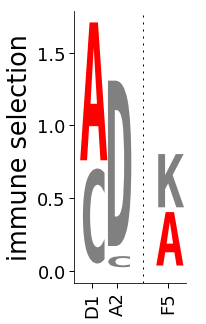

In [12]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            color_col='color',
                            xtick_col='site_label',
                            xlabel='',
                            ylabel='immune selection',
                            heightscale=2,
                            axisfontscale=1.5
                            )

Now we make a plot where we hide the axes and their labels altogether:

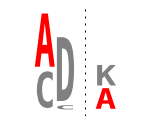

In [13]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            color_col='color',
                            xtick_col='site_label',
                            hide_axis=True
                            )

# Multiple logos in one figure

So far we have made individual plots on newly generate figures created
by `dmslogo.logo.draw_logo`.

But we can also create a multi-axis figure, and then draw several logos
onto that. The easiest way to do this is with the
`dmslogo.facet.facet_plot` command described below. But we can
also do it using matplotlib subplots as here:

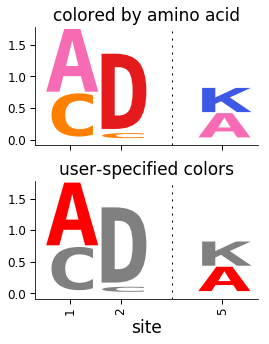

In [14]:
# make figure with two subplots: two rows, one column
fig, axes = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.3) # add more vertical space for axis titles
fig.set_size_inches(4, 5)

# draw top plot, no x-axis ticks or label, default coloring
_ = dmslogo.draw_logo(data.assign(no_ticks=''),
                      x_col='site',
                      letter_col='letter',
                      letter_height_col='height',
                      ax=axes[0],
                      xlabel='',
                      ylabel='',
                      xtick_col='no_ticks',
                      title='colored by amino acid')

# draw bottom plot, color as specified in `data`
_ = dmslogo.draw_logo(data,
                      x_col='site',
                      letter_col='letter',
                      letter_height_col='height',
                      color_col='color',
                      ax=axes[1],
                      ylabel='',
                      title='user-specified colors')

Real HIV data from Dingens et al

In [An Antigenic Atlas of HIV-1 Escape from Broadly Neutralizing
Antibodies Distinguishes Functional and Structural
Epitopes](https://doi.org/10.1016/j.immuni.2018.12.017) (Dingens et
al, 2019), there are plots of immune selection on HIV envelope (Env)
from anti-HIV antibodies at just a subset of “strongly selected” sites
for each antibody.

Here we use `dmslogo` to re-create one of those plots (the one in
Figure 3D,E) showing antibodies *PG9* and *PGT145*.

# Download data to plot

Download the data from the paper’s [GitHub
repo](https://github.com/jbloomlab/EnvsAntigenicAtlas/) giving the
immune selection (as [fraction surviving above
average](https://jbloomlab.github.io/dms_tools2/fracsurvive.html))
for these two antibodies, and read the data into a DataFrame:

In [15]:
antibodies = ['PG9', 'PGT145']

data_hiv = []
for antibody in antibodies:
    datafile = ('https://raw.githubusercontent.com/jbloomlab/EnvsAntigenicAtlas/master/results/'
                f"fracsurviveaboveavg/concavg_wtDNA_ctrl/summary_{antibody}-medianmutfracsurvive.csv")
    with urllib.request.urlopen(datafile) as f:
        data_hiv.append(pd.read_csv(f).assign(antibody=antibody))

data_hiv = pd.concat(data_hiv)

Here are the first few lines of the data frame. For each mutation it
gives the immune selection (*mutfracsurvive*):

In [16]:
data_hiv.head(n=5)

,site,wildtype,mutation,mutfracsurvive,antibody
0,160,N,I,0.256342,PG9
1,160,N,L,0.207440,PG9
2,160,N,R,0.184067,PG9
3,171,K,E,0.176118,PG9
4,428,Q,Y,0.150981,PG9


The sites in this data frame are in the [HXB2 numbering
scheme](https://www.hiv.lanl.gov/content/sequence/HIV/REVIEWS/HXB2.html),
which is **not** the same as sequential integer numbering of the actual
BG505 Env for which the immune selection was measured. So for our
plotting, we also need to create a column (which we will call `isite`)
that numbers the sites a sequential numbering. A file that converts
between HXB2 and and BG505 numbering is part of the paper’s [GitHub
repo](https://github.com/jbloomlab/EnvsAntigenicAtlas/). We download
the data in that file and add it to our data frame:

In [17]:
numberfile = ('https://raw.githubusercontent.com/jbloomlab/EnvsAntigenicAtlas/'
              'master/results/HXB2_numbering/BG505_to_HXB2.csv')
with urllib.request.urlopen(numberfile) as f:
    data_hiv = (pd.read_csv(f)
                .rename(columns={'original':'isite', 'new':'site'})
                [['site', 'isite']]
                .merge(data_hiv, on='site', validate='one_to_many')
                )

Now see how this data frame also has the `isite` column which has
sequential integer numbering of the sequence:

In [18]:
data_hiv.head(n=5)

,site,isite,wildtype,mutation,mutfracsurvive,antibody
0,31,30,A,Y,0.030824,PG9
1,31,30,A,K,0.006860,PG9
2,31,30,A,D,0.006774,PG9
3,31,30,A,S,0.004407,PG9
4,31,30,A,R,0.003501,PG9


We add a column (`site_label`) that gives the site labeled with the
wildtype identity that we can use for axis ticks. We also indicate which
sites to show (column `show_site`) in our logoplot snippet (these are
just the same ones in Figure 3 of the [Dingens et al
(2019)](https://doi.org/10.1016/j.immuni.2018.12.017) paper):

In [19]:
# same sites in Figure 3D,E of Dingens et al (2019)
sites_to_show = map(str, list(range(119, 125)) +
                         [127] +
                         list(range(156, 174)) +
                         list(range(199, 205)) +
                         list(range(312, 316))
                         )

data_hiv = (
    data_hiv
    .assign(site_label=lambda x: x['wildtype'] + x['site'],
            show_site=lambda x: x['site'].isin(sites_to_show),
            )
    )

See how the data frame now has the `site_label` and `show_site`
columns:

In [20]:
data_hiv.head(n=5)

,site,isite,wildtype,mutation,mutfracsurvive,antibody,site_label,show_site
0,31,30,A,Y,0.030824,PG9,A31,False
1,31,30,A,K,0.006860,PG9,A31,False
2,31,30,A,D,0.006774,PG9,A31,False
3,31,30,A,S,0.004407,PG9,A31,False
4,31,30,A,R,0.003501,PG9,A31,False


# Draw a logo plot

Now we make logo plots of the sites that we have selected to show, here
just for the *PG9* antibody. Note how we query `data_hiv` for only the
antibody (*PG9*) and the sites of interest (`show_site` is `True`):

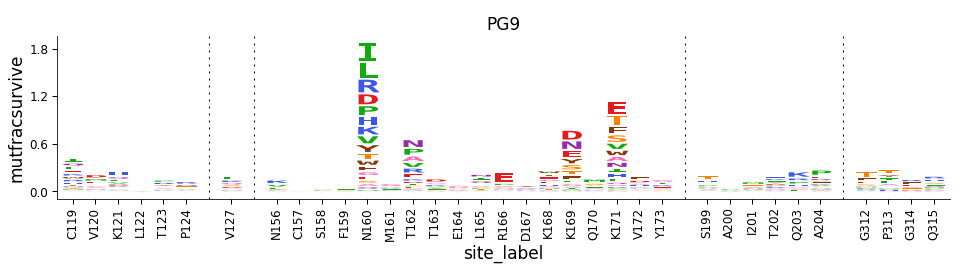

In [21]:
fig, ax = dmslogo.draw_logo(data_hiv.query('antibody == "PG9"').query('show_site'),
                            x_col='isite',
                            letter_col='mutation',
                            letter_height_col='mutfracsurvive',
                            xtick_col='site_label',
                            title='PG9')

# Draw site-level line plots

The logo plot above shows selection at a subset of sites. But we might
also want to summarize the selection across all sites (as is done in
Figure 2 of [Dingens et al
(2019)](https://doi.org/10.1016/j.immuni.2018.12.017)).

An easy way to do this is to create a summary statistic at each site.
Here we compute the average
[fracsurvive](https://jbloomlab.github.io/dms_tools2/dms_tools2.fracsurvive.html)
at each site across all mutations, and add that to our data frame:

In [22]:
data_hiv = (
    data_hiv
    .query('mutation != wildtype') # only care about mutations; get rid of wildtype values
    .assign(avgfracsurvive=lambda x: x.groupby(['antibody', 'site'])
                                        ['mutfracsurvive']
                                        .transform('mean')
            )
    )

Now the data frame has a column (`avgfracsurvive`) giving the average
fraction surviving at each site:

In [23]:
data_hiv.head(n=5)

,site,isite,wildtype,mutation,mutfracsurvive,antibody,site_label,show_site,avgfracsurvive
0,31,30,A,Y,0.030824,PG9,A31,False,0.00329
1,31,30,A,K,0.006860,PG9,A31,False,0.00329
2,31,30,A,D,0.006774,PG9,A31,False,0.00329
3,31,30,A,S,0.004407,PG9,A31,False,0.00329
4,31,30,A,R,0.003501,PG9,A31,False,0.00329


Now we use the `dmslogo.line.draw_line` function to draw the line plot for
antibody *PG9*. Note how we provide our new `avgfracsurvive` column as
`height_col`. We also provide our previously defined `show_site`
column (which indicates which sites were shown in the logo plot) as the
`show_col`, so that the line plot has the sites shown in the above
logo plot underlined in orange:

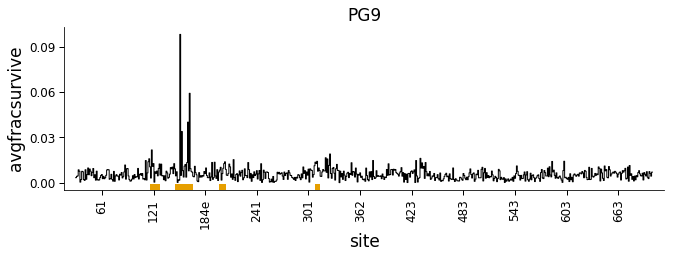

In [24]:
fig, ax = dmslogo.draw_line(data_hiv.query('antibody == "PG9"'),
                            x_col='isite',
                            height_col='avgfracsurvive',
                            xtick_col='site',
                            show_col='show_site',
                            title='PG9',
                            widthscale=2)

# Combining site-level line and mutation-level logo plots

Of course, a line plot isn’t that hard to make, but the advantage of
doing this using the approach above is that we can combine
`dmslogo.line.draw_line` and `dmslogo.logo.draw_logo` to create a single
figure that shows the site-selection in a line plot and the selected
sites as logo plots.

The easiest way to do this using the
`dmslogo.facet.facet_plot` command described below. But first
here we do it using matplotlib subplots. Note how the resulting
plot combines the line and logo plots, with the line plot using the orange
underline to indicate which sites are zoomed in the logo plot:

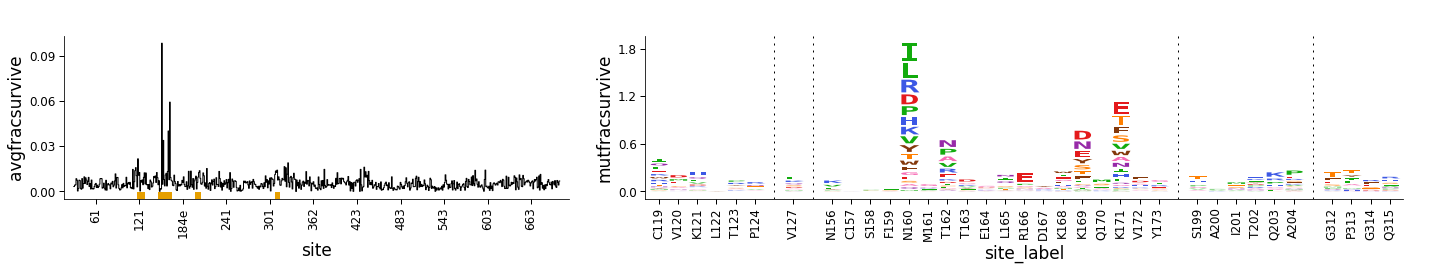

In [25]:
fig, axes = plt.subplots(1, 2,
                         gridspec_kw={'width_ratios':[1, 1.5]})
fig.subplots_adjust(wspace=0.12)
fig.set_size_inches(24, 3)

_ = dmslogo.draw_line(data_hiv.query('antibody == "PG9"'),
                      x_col='isite',
                      height_col='avgfracsurvive',
                      xtick_col='site',
                      show_col='show_site',
                      ax=axes[0])

_ = dmslogo.draw_logo(data_hiv.query('antibody == "PG9"').query('show_site'),
                      x_col='isite',
                      letter_col='mutation',
                      letter_height_col='mutfracsurvive',
                      ax=axes[1],
                      xtick_col='site_label')

Faceting line and logo plots together

The easiest way to facet line and logo plots together is using
`dmslogo.facet.facet_plot`.

The cell below shows how this is done. You pass the data to this
function, as well any columns and rows we would like to facet, the
`x_col` and `show_col` arguments shared between the line and logo
plots, and additional keyword arguments for
`dmslogo.logo.draw_logo` and
`dmslogo.line.draw_line`:

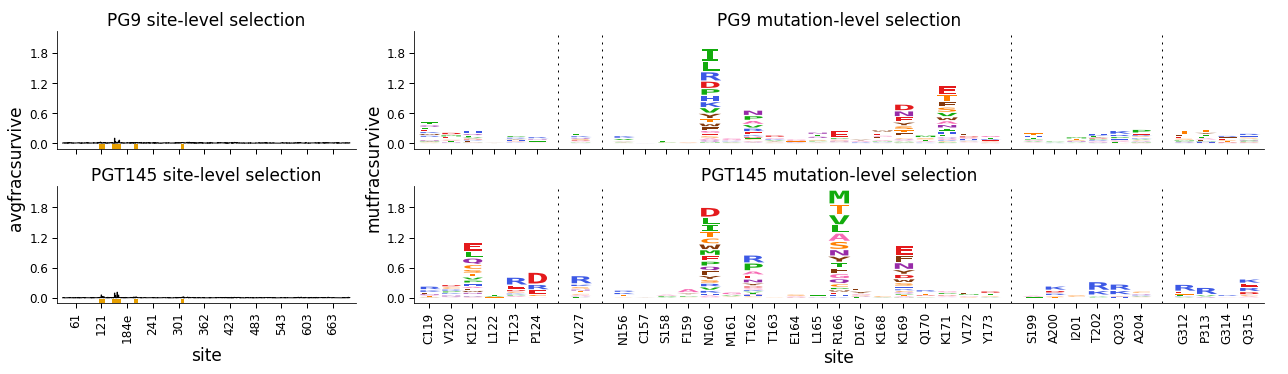

In [26]:
fig, axes = dmslogo.facet_plot(
                    data_hiv,
                    gridrow_col='antibody',
                    x_col='isite',
                    show_col='show_site',
                    draw_line_kwargs=dict(height_col='avgfracsurvive',
                                          xtick_col='site'),
                    draw_logo_kwargs=dict(letter_col='mutation',
                                          letter_height_col='mutfracsurvive',
                                          xtick_col='site_label',
                                          xlabel='site'),
                    line_titlesuffix='site-level selection',
                    logo_titlesuffix='mutation-level selection'
                    )

There are various options to tweak the formatting of the faceted plot. Here we demonstrate a few of them:

> * We assign a more generic ylabel (“immune selection”) to each plot via the appropriate `\*_kwargs` option.

> * We use the `share_ylim_across_rows=False` option to allow each row to have its own y-axis limits.

> * We use the `share_xlabel` and `share_ylabel` options to share the x- and y-labels across the line and logo plots.

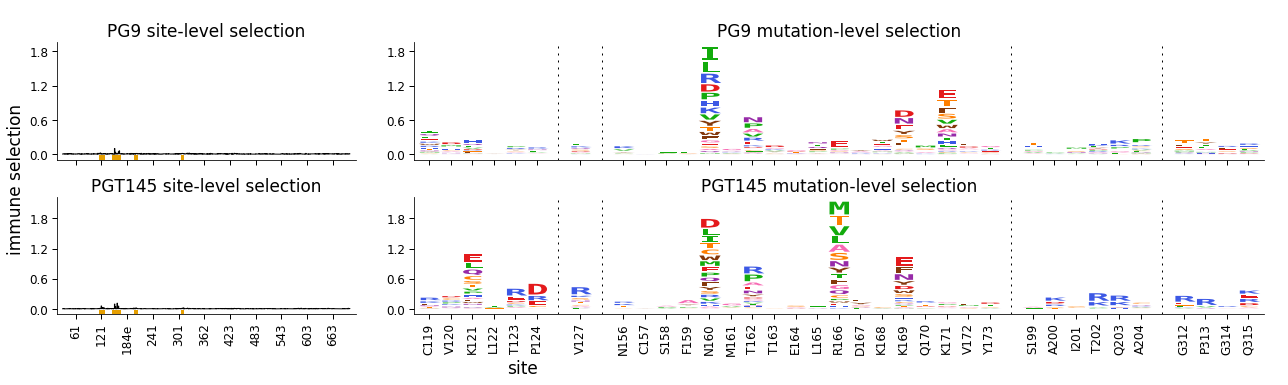

In [27]:
fig, axes = dmslogo.facet_plot(
                    data_hiv,
                    gridrow_col='antibody',
                    x_col='isite',
                    show_col='show_site',
                    draw_line_kwargs=dict(height_col='avgfracsurvive',
                                          xtick_col='site',
                                          ylabel='immune selection'),
                    draw_logo_kwargs=dict(letter_col='mutation',
                                          letter_height_col='mutfracsurvive',
                                          xtick_col='site_label',
                                          xlabel='site',
                                          ylabel='immune selection'),
                    line_titlesuffix='site-level selection',
                    logo_titlesuffix='mutation-level selection',
                    share_ylim_across_rows=False,
                    share_xlabel=True,
                    share_ylabel=True,
                    )

# Write *DMSLOGO* in Comic Sans font

Generate data to plot by creating the pandas DataFrame `word_data`. In
this data frame, we choose large heights and bright colors for the
letters in our word (*DMSLOGO*), and smaller letters and gray for other
letters.

In [28]:
word = 'DMSLOGO'
lettercolors = [CBPALETTE[1]] * len('dms') + [CBPALETTE[2]] * len('logo')

# make data frame with data to plot
random.seed(0)
word_data = {'x':[], 'letter':[], 'height':[], 'color':[]}
for x, (letter, color) in enumerate(zip(word, lettercolors)):
    word_data['x'].append(x)
    word_data['letter'].append(letter)
    word_data['color'].append(color)
    word_data['height'].append(random.uniform(1, 1.5))
    for otherletter in random.sample(sorted(set('ACTG') - {letter}), 3):
        word_data['x'].append(x)
        word_data['letter'].append(otherletter)
        word_data['color'].append(CBPALETTE[0])
        word_data['height'].append(random.uniform(0.1, 0.5))
word_data = pd.DataFrame(word_data)
word_data.head(n=6)

,x,letter,height,color
0,0,D,1.422211,#E69F00
1,0,T,0.486186,#999999
2,0,A,0.294371,#999999
3,0,C,0.467294,#999999
4,1,M,1.414926,#E69F00
5,1,T,0.301875,#999999


Now draw the logo. We use the `fontfamily` argument to set a Comic
Sans font This also requires us to increase `fontaspect` since this
font is wider, and increase `letterpad` as the font height sometimes
sticks out beyond its baseline:

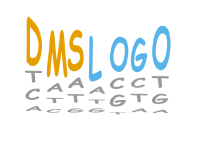

In [29]:
fig, ax = dmslogo.draw_logo(data=word_data,
                            letter_height_col='height',
                            x_col='x',
                            letter_col='letter',
                            color_col='color',
                            fontfamily='Comic Sans MS',
                            hide_axis=True,
                            fontaspect=0.85,
                            letterpad=0.05
                            )

## Subtleties of non-default fonts

Note however that you in general may have difficulty using most fonts
(other than the `dmslogo` default) for good-looking logos.
The reason is that for a clean and accurate letter-height logo plots, the font must:

> * be mono-spaced

> * not have descenders

> * have all letters go exactly from the baseline to the top

You can manually edit a font to do this as has been done for the
current `dmslogo` default font; to see more information on this
look [here for details](https://github.com/jbloomlab/dmslogo/tree/master/dmslogo/ttf_fonts).